In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb2025/IMDB.csv


In [2]:
#Import data and dataset overview
imdb_2025= ("/kaggle/input/imdb2025/IMDB.csv")
imdb_2025=pd.read_csv(imdb_2025,index_col=0)
imdb_2025.columns
imdb_2025.head()




,Const,Created,Modified,Description,Title,Original Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
Position,,,,,,,,,,,,,,,
1,tt1312221,2025-11-09,2025-11-09,NaN,Frankenstein,Frankenstein,https://www.imdb.com/title/tt1312221/,Movie,7.5,149,2025,"Drama, Fantasy, Horror, Sci-Fi",220036,2025-11-07,Guillermo del Toro
2,tt32916440,2025-12-22,2025-12-22,NaN,Marty Supreme,Marty Supreme,https://www.imdb.com/title/tt32916440/,Movie,8.3,149,2025,"Drama, Sport",22747,2025-12-26,Josh Safdie
3,tt12299608,2025-03-09,2025-03-09,NaN,Mickey 17,Mickey 17,https://www.imdb.com/title/tt12299608/,Movie,6.7,137,2025,"Adventure, Comedy, Fantasy, Sci-Fi",222811,2025-03-07,Bong Joon Ho
4,tt21815562,2025-03-23,2025-03-24,Misunderstood takes a documentary like approac...,The Alto Knights,The Alto Knights,https://www.imdb.com/title/tt21815562/,Movie,5.9,123,2025,"Biography, Crime, Drama, History",19126,2025-03-21,Barry Levinson
5,tt5950044,2025-07-13,2025-09-19,NaN,Superman,Superman,https://www.imdb.com/title/tt5950044/,Movie,7.1,129,2025,"Action, Adventure, Sci-Fi",375529,2025-07-11,James Gunn


In [3]:
#Clean columns
imdb_2025.columns = (
    imdb_2025.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)
imdb_2025.columns


Index(['const', 'created', 'modified', 'description', 'title',
       'original_title', 'url', 'title_type', 'imdb_rating', 'runtime_(mins)',
       'year', 'genres', 'num_votes', 'release_date', 'directors'],
      dtype='object')

In [4]:
#Average rating of movies
imdb_2025['imdb_rating'].mean()


np.float64(6.796052631578948)

In [5]:
#Average runtime in minutes
imdb_2025['runtime_(mins)'].mean()

np.float64(118.15789473684211)

In [6]:
#Import seaborn data visualization from matplotlib
import seaborn as sns
import matplotlib as mlt

<Axes: xlabel='imdb_rating', ylabel='Count'>

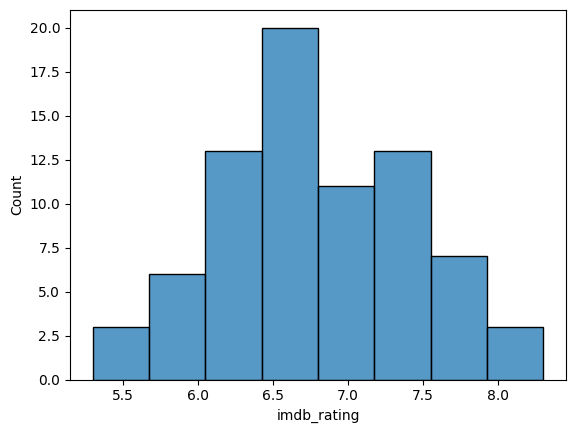

In [7]:
#Histogram plot of movie ratings
sns.histplot(imdb_2025,x='imdb_rating')



**Visualization Analysis:** 20 movies have a rating of 6.5 which aligns closely to the average rating of 6.7. 

<Axes: xlabel='runtime_(mins)', ylabel='Count'>

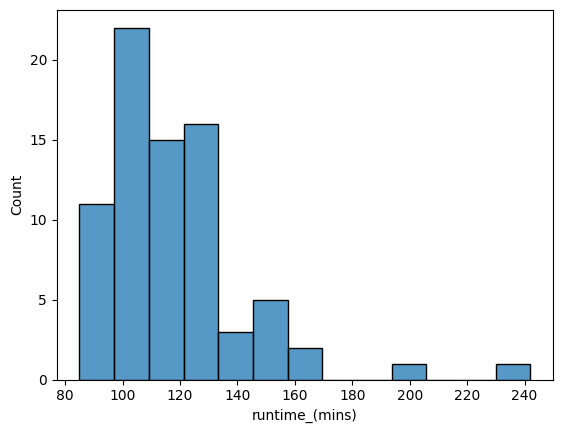

In [8]:
#Histogram plot of movie runtime in minutes
sns.histplot(imdb_2025,x='runtime_(mins)')

**Visualization Analysis**: most movies made in 2025 were less than 160mins (2hr 40mins) in length, with the highest count of 20 movies being 100mins (1hr 40mins) in length.

Text(0.5, 1.0, 'Relationship between Runtime and Ratings')

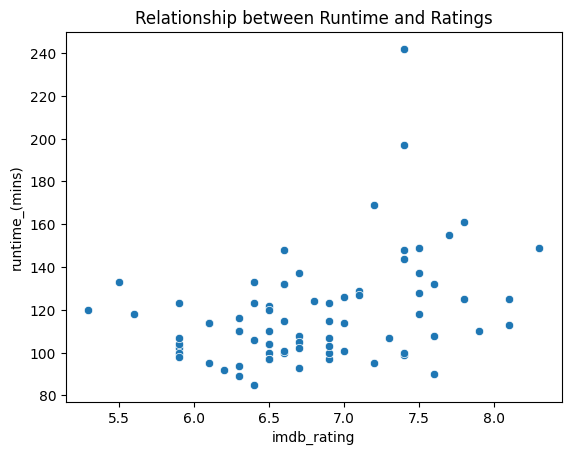

In [9]:
#Relationship between rating and runtime 
sns.scatterplot(imdb_2025,x='imdb_rating',y='runtime_(mins)').set_title('Relationship between Runtime and Ratings')

**Visualization Analysis:** there is no strong relationship between longer movie lengths and having a higher rating. In fact there are more movies with runtimes less than the average 118mins in length with ratings higher than the average 6.7.

**Final Conclusions:**
* The average IMDb rating for 2025 movies is approximately 6.8.
* Most movies have runtimes between 90–160 minutes.
* There is no strong correlation between runtime and rating, suggesting longer movies do not necessarily receive higher ratings.